# TP3 Traitement Audio 

##  Reconstruction du signal audio : TFCT inverse
### $ Auteurs: $
### $ koussaila $ $ KADI $ 
### $ Mickaël$  $Da$ $Rocha$ $Martin$

---------------------------------------
### $email:$ $kadi.koussaila@outlook.fr$



## Résumé:
La première partie du TP consiste à implémenter l’algorithme de Transformée de Fourier à Court-Terme Inverse (ITFCT). La fonction, que l’on nommera itfct.py, aura pour paramètres d’entrée la TFCT d’un signal, le pas d’avancement de la fenêtre d’analyse Nhop , ainsi que le nombre de points fréquentiels utilisés dans l’algorithme TFCT Nfft et la fréquence d’échantillonnage Fs du signal initial. La TFCT, notée x mat , sera écrite sous la forme d’une matrice de
dimensions $nl × L$ éterminées au $TP2$

## étape de l'algorithme OLA (overlap-Add):
*   $Etape 1$ : reconstruire la TFD de chaque trame à partir des colonnes de la matrice x mat de TFCT, dans des vecteurs de taille Nfft.

*   $Etape 2$ : reconstruire chaque trame fenêtrée en effectuant la TFD inverse (ITFD) des vecteurs de $TFD : ⇒ L$ trames fenêtrées $y_l , l ∈ [0,L − 1]$
La TFD inverse reconstruit des trames de longueur N f f t. Cette longueur est supposée égale à la longueur des trames découpées lors de l’algorithme TFCT (c’est le cas si la TFD a été effectuée sur un nombre correct de points)

*   $Etape 3$ : décaler la l è trame $y_l , de (l − 1)$ trames $⇒$ synchronisation des $y_l , l ∈ [1, L] $:
$y_1 [n] ⇒ y_1 [n] = x[n]w[n]$
$y_2 [n] ⇒ y_2 [n − N_hop ] = x[n]w[n − N hop ]$
$...$
$y_L [n] ⇒y_L [n − (L − 1)N_hop ] = x[n]w[n − (L − 1)N_hop ]$

Etape 4 : sommer les trames décalées $ y_l [n − (l − 1)N_hop]$

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.signal as signal
from numpy.fft import fft, ifft, fftshift
from playsound import playsound
from IPython.display import display, Audio

## la TFCT 

In [111]:
def tfct(x, Nwin, Nhop, Nfft, fe):
    
    # L nombre de trame à extraire dans xvect une partie du signal
    L=int((len(x)-Nwin)/Nhop) +1 
    # M nombre minimal de points fréquentiels utiles pour chaque spectre
    M=Nfft 
    
    # initialisation de la matrice xmat de taille Mx
    xmat=np.zeros((M,L))        
    sigMat = []
    colonne=0
    i=0
    
    # fenetre de hamming de taille Nwin
    hamming=np.hamming(Nwin)
    

    for l in range(L): 
        for j in range(int(i),int(i+Nwin)):
             #on recupere la trame correpondant i+Nwin trame
            sigMat.append(x[j]) 
        
        # on multiplie notre fenetre par les Nfft points de notre signal x
        TFD=np.fft.fft(sigMat*hamming)  
         #le spectre 
        xmat[:,colonne]=np.real(TFD)
        
        # on incremente la variable qui change les collonnes de la matrice Xmat
        colonne+=1 
        # on déclale d'une demi trame, soit le pas d'avancement Nhop 
        i=i+Nhop  
        # on efface la trame ancienne
        sigMat=[] 
        
    
    f=np.fft.fftfreq(len(x),1/fe)   #fréquence
    t=len(x)/fe                     #vecteur temps 
    print(M,L)
    return xmat,t,f 

# Partie 1: Implémentation de la TFCT inverse par Overlap-Add (OLA)

4096 82


/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


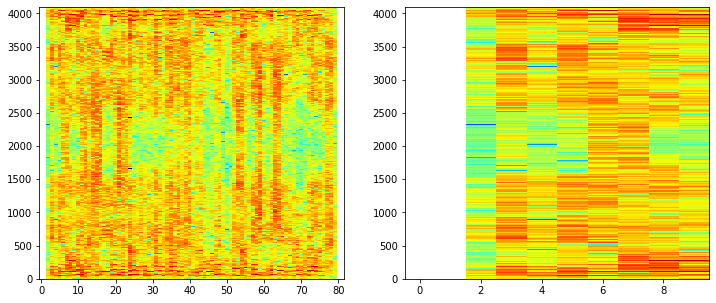

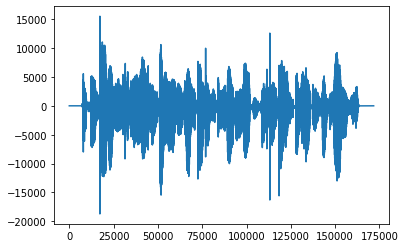

In [112]:
Nwin = 4096
Nfft = Nwin
Nhop = Nwin//2 # pas d'avancement de chaque trame.

fe,xvect=wav.read("sound.wav")
display(Audio(xvect,rate=fe))



xmat,temps,freq=tfct(xvect,Nwin,Nhop,Nfft,fe)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(20*np.log10(abs(xmat)),aspect ='auto', origin='lower',cmap='jet')

plt.subplot(122)
plt.imshow(20*np.log10(abs(xmat[:,0:10])),aspect ='auto', origin='lower',cmap='jet')
plt.show()

plt.figure()
plt.plot(xvect, label="sound.wave")

## TFCT inverse

In [113]:
def itfct(xmat,Nhop,Nfft,fs):
    #etape 1 
    Y=np.zeros(Nhop*(xmat.shape[1]-1)+Nfft) # création du vecteur rempli de 0
    #etape2
    yl=np.zeros(Nfft)
    e=0
    for i in range(xmat.shape[1]):
        yl=np.fft.ifft(np.transpose(xmat[:,i]))  # TFD inverse de chaque trame 
        for j in range(e,e+Nfft):
            Y[j]+=yl[j-e] # somme des 
        e+=Nhop  # décalage 
        
    k=np.sum(np.hamming(Nfft)/Nhop)
    Y=Y/k #normalisation
    temps=np.linspace(0,len(Y)/fs,len(Y))
    return temps, Y

/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


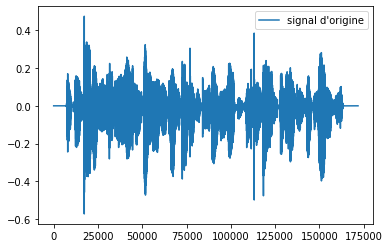

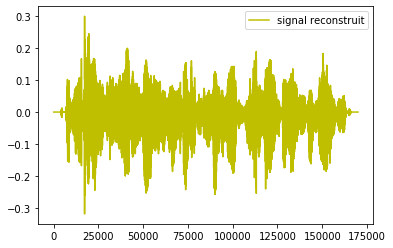

In [97]:
temps2,yvect2=itfct((xmat),Nhop,Nfft,fe)

plt.figure()
plt.plot(xvect/2**15, label="signal d'origine")
plt.legend()
plt.show()


plt.figure()
plt.plot(yvect2/2**15,label='signal reconstruit',c='y')
plt.legend()
plt.show()



/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


4096 82
la taille du signal après itfct est : 169984


/home/koussaila/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


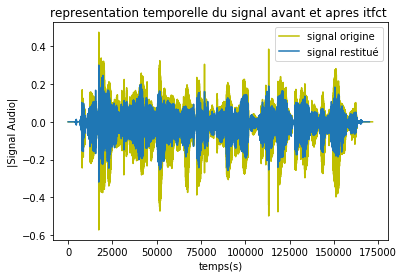

In [98]:
fe,x=wav.read("sound.wav")
Nwin=4096
Nfft=Nwin
Nhop=Nwin//2
xmat, ts,fs= tfct(x, Nwin, Nhop,Nfft, fe)
te,ye=itfct(xmat,Nhop,Nfft,fe)
print("la taille du signal après itfct est :",len(ye))
plt.figure()
plt.plot(x/2**15,'y',label='signal origine')
plt.plot(ye/2**15,label='signal restitué')
plt.title("representation temporelle du signal avant et apres itfct ")
plt.ylabel("|Signal Audio|")
plt.xlabel("temps(s)")
plt.legend()
plt.show()


#---écouter les deux signaux, d'origine et reconstruit. 
display(Audio(x,rate=fe))
display(Audio(ye,rate=fe))


On conctate que l'on ne peux pas recuperer le meme nombre de point que le signal d'originie,car la trame selectionné n'est pas un multiple du signal et on a donc une perte d'échantillons sur la derniere trame.

les atténuations d'amplitudes sont dues aux erreurs de calcules cumullé et aussi au multiplication par la fenêtre de hamming lors de la TFCT. c'est pour cela on utilise un amplificateur pour amplifier l'amplitude du signal reconstrui. 

on constate qu'on a petit écho dû à l'argument qu'on a pas utilisé dans la reconstruction.


In [71]:
# erreur quadratique 
# question 5 fin
E_quad=np.sum((x[0:len(ye)]-ye)**2)/len(ye)
print(E_quad)

2054607.7988644708


# Partie 2: Application au débruitage pour soustraction spectrale

## QST 7: 

nb echantillons : 158340
fréquence echantillonage : 16000


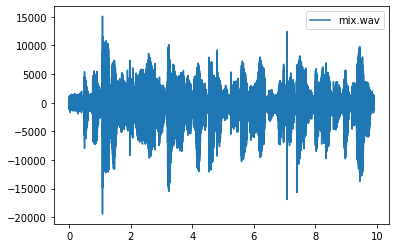

/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


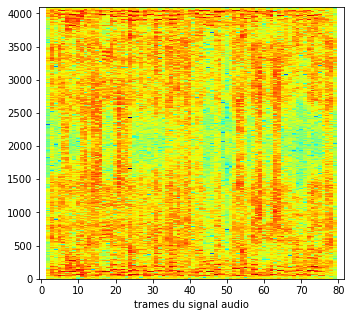

In [99]:
#question 7

f_mix,x_mix=wav.read("mix.wav")
t=np.arange(start=0, stop=len(x_mix)/f_mix, step=1/f_mix)
print("nb echantillons :",len(x_mix))
print("fréquence echantillonage :",f_mix)
display(Audio(x_mix,rate=f_mix))


#-------------------
Nwin=1024
Nfft=Nwin
Nhop=Nwin//2

plt.figure()
plt.plot(t,x_mix, label='mix.wav')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(20*np.log(abs(xmat)),aspect ='auto', origin='lower',cmap='jet')
plt.xlabel("trames du signal audio")
plt.show()

## QST 8:

/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


1024 308


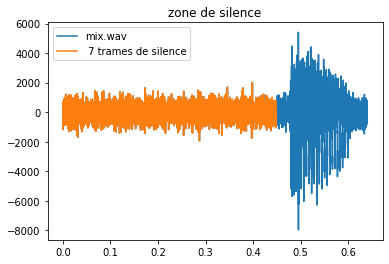

In [100]:
#-----spectograme:---
xmat,temps,freq=tfct(x_mix,Nwin,Nhop,Nfft,f_mix)

#----- les trames de silences: dans la région de la 60ème trame----
t=np.arange(start=0,stop=(len(x_mix)/f_mix),step=1/f_mix)
trame=[0*Nwin,10*Nwin]


plt.title("zone de silence")
plt.plot(t[trame[0]:trame[1]],x_mix[trame[0]:trame[1]], label='mix.wav')
plt.plot(t[0*Nwin:7*Nwin],x_mix[0*Nwin:7*Nwin], label=' 7 trames de silence')
plt.legend()
plt.show()

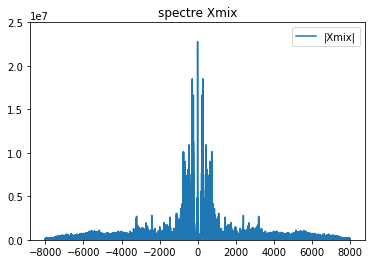

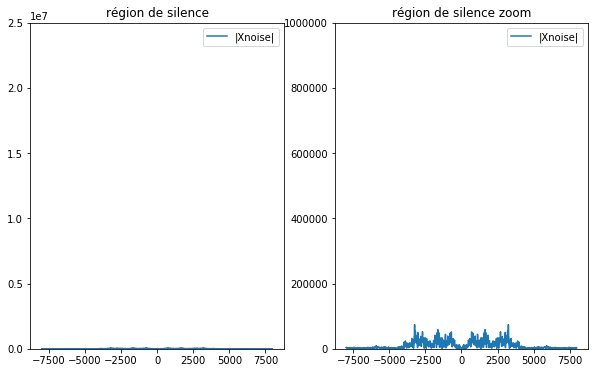

In [101]:
#-----le spectre d'amplitude |Xnoise| -----------
Xnoise=x_mix[0*Nwin:1*Nwin]  # on prend une trame dans la région de silence

TFD1=np.fft.fft(Xnoise)
spectre_Xnoise=np.fft.fftshift(TFD1)
spectre_Xnoise=np.absolute(spectre_Xnoise)
freq1=np.arange(-f_mix/2,f_mix/2,f_mix/len(spectre_Xnoise))


TFD2=np.fft.fft(x_mix)
spectre_xmix=np.fft.fftshift(TFD2)
spectre_xmix=np.absolute(spectre_xmix)
freq2=np.arange(-f_mix/2,f_mix/2,f_mix/len(spectre_xmix))

#tracer le spectre 
plt.figure()
plt.plot(freq2,spectre_xmix,label="|Xmix|")
plt.title("spectre Xmix")
plt.ylim(0,2.5*10**7)
plt.legend()

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(freq1,spectre_Xnoise,label="|Xnoise|")
plt.title("région de silence")
plt.ylim(0,2.5*10**7)
plt.legend()

plt.subplot(1,2,2)
plt.plot(freq1,spectre_Xnoise,label="|Xnoise|")
plt.title("région de silence zoom")
plt.ylim(0,0.1*10**7)
plt.legend()
plt.show()

## QST 9:

/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


1024 308


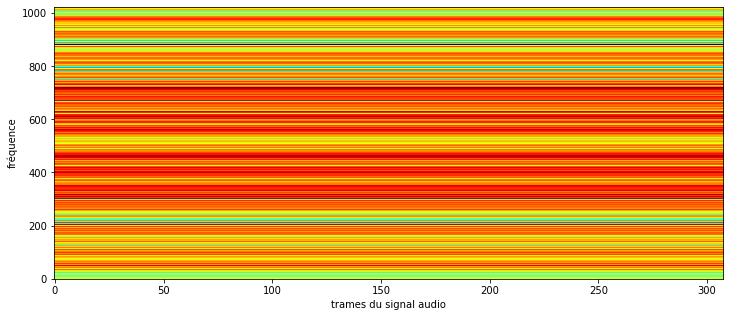

In [102]:
#question 9:

# ---- soustraction --------
xmat_mix, ts,fs= tfct(x_mix, Nwin, Nhop,Nfft, f_mix)

def bruitExtract(xmat,bruit):
    xmat_clean=np.zeros((xmat.shape[0],xmat.shape[1]))
    for i in range(xmat.shape[1]):
        xmat_clean[:,i]=xmat[:,1]-bruit
    return xmat_clean

xmat_clean=bruitExtract(xmat_mix,spectre_Xnoise)

#----spectogramme-----------
plt.figure(figsize=(12,5))
plt.imshow(20*np.log(abs(xmat_clean)),aspect ='auto', origin='lower',cmap='jet')
plt.xlabel("trames du signal audio")
plt.ylabel("fréquence")
plt.show()

### remarque: on constate qu'on a pu récupérer le signal d'origine mes avec une atténuation, ce qui necessitera un amplificateur. 

pour l'erreur quadratique après la reconstruction: 2257033.3997436143

## QST 10

/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


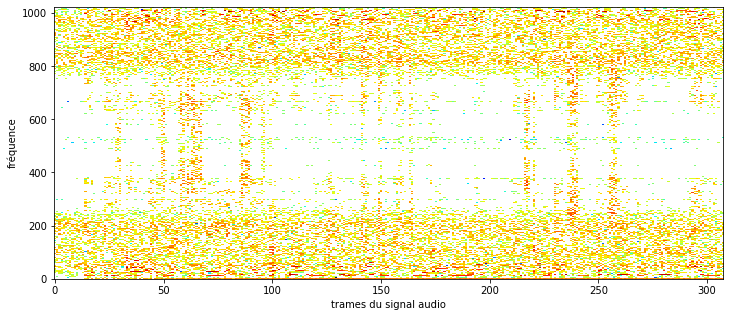

In [103]:
def bruitExtract_redressement(xmat,bruit):
    xmat_clean=np.zeros((xmat.shape[0],xmat.shape[1]))
    x=np.zeros((xmat.shape[0],1))
    for i in range(xmat.shape[1]):
        x=xmat[:,i]-bruit/2
        for j in range(len(x)):
            if x[j]<0:
                x[j]=0
        xmat_clean[:,i]=x
                
    return xmat_clean

xmat_clean_redresse=bruitExtract_redressement(xmat_mix,spectre_Xnoise)

#----spectogramme-----------
plt.figure(figsize=(12,5))
plt.imshow(20*np.log(abs(xmat_clean_redresse)),aspect ='auto', origin='lower',cmap='jet')
plt.xlabel("trames du signal audio")
plt.ylabel("fréquence")
plt.show()

## QST 11

/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


la taille du signal après itfct est : 169984 171744


/home/koussaila/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


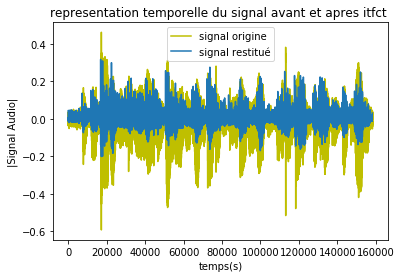

erreur quadratique après clean: 3967417.0769980885


In [104]:
#----- spectogramme --------
te,y=itfct(xmat_clean_redresse,Nhop,Nfft,f_mix)

print("la taille du signal après itfct est :",len(ye),len(x))
plt.figure()
plt.plot(x_mix/2**15,'y',label='signal origine')
plt.plot(y/2**15,label='signal restitué')
plt.title("representation temporelle du signal avant et apres itfct ")
plt.ylabel("|Signal Audio|")
plt.xlabel("temps(s)")
plt.legend()
plt.show()


#------écouter le signal reconstrui et sans bruit -------
display(Audio(y,rate=f_mix))

#----- on recalcul l'erreur --------
E_quad_clean=np.sum((x_mix[0:len(y)]-y)**2)/len(y)
print("erreur quadratique après clean:",E_quad_clean)

## QST 12:

on récupère cette fois-ci le spectre et l'argument du signal. 

In [107]:
def tfct_12(x, Nwin, Nhop, Nfft, fe):
    
    # L nombre de trame à extraire dans xvect une partie du signal
    L=int((len(x)-Nwin)/Nhop) +1 
    # M nombre minimal de points fréquentiels utiles pour chaque spectre
    M=Nfft 
    
    # initialisation de la matrice xmat de taille Mx
    xmat=np.zeros((M,L))        
    sigMat = []
    colonne=0
    i=0
    
    # fenetre de hamming de taille Nwin
    hamming=np.hamming(Nwin)
    

    for l in range(L): 
        for j in range(int(i),int(i+Nwin)):
             #on recupere la trame correpondant i+Nwin trame
            sigMat.append(x[j]) 
        
        # on multiplie notre fenetre par les Nfft points de notre signal x
        TFD=np.fft.fft(sigMat*hamming)  
         #le spectre 
        xmat[:,colonne]=((np.real(TFD)+np.conj(TFD))**2)*np.exp(np.angle(TFD))
        
        # on incremente la variable qui change les collonnes de la matrice Xmat
        colonne+=1 
        # on déclale d'une demi trame, soit le pas d'avancement Nhop 
        i=i+Nhop  
        # on efface la trame ancienne
        sigMat=[] 
        
    
    f=np.fft.fftfreq(len(x),1/fe)   #fréquence
    t=len(x)/fe                     #vecteur temps 
    print(M,L)
    return xmat,t,f 

/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


1024 308


/home/koussaila/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


la taille du signal après itfct est : 169984


/home/koussaila/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


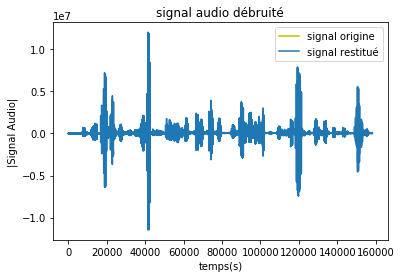

In [108]:
# refaire la TFCT sur le signal pour récupérer même l'argument (récupérer tout le TFD complexe)

xmat_mix,t,f = tfct_12(x_mix, Nwin, Nhop, Nfft, f_mix)

# faire le débruitage et le redressement: ---

xmat_clean_redresse=bruitExtract_redressement(xmat_mix,spectre_Xnoise)

# TFCT inverse: ------------------------------
te,y=itfct(xmat_clean_redresse,Nhop,Nfft,f_mix)

print("la taille du signal après itfct est :",len(ye))
plt.figure()
plt.plot(x_mix/2**15,'y',label='signal origine')
plt.plot(y/2**15,label='signal restitué')
plt.title("signal audio débruité")
plt.ylabel("|Signal Audio|")
plt.xlabel("temps(s)")
plt.legend()
plt.show()


#------écouter le signal reconstrui et sans bruit -------
display(Audio(y,rate=f_mix))
